Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/hr15h1k35h/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
CUDA available: True

image 1/1 /home/hr15h1k35h/Desktop/da_assignment_III/urban.jpeg: 448x640 4 persons, 3 cars, 1 clock, 40.7ms
Speed: 2.7ms preprocess, 40.7ms inference, 24.7ms postprocess per image at shape (1, 3, 448, 640)


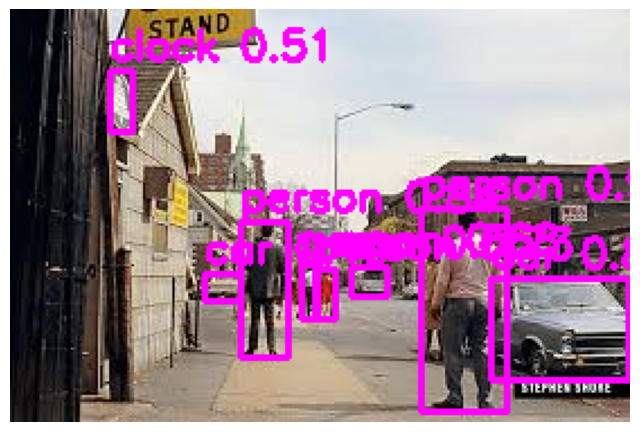


Evaluating model on validation dataset...
Ultralytics 8.4.11 🚀 Python-3.13.7 torch-2.10.0+cu130 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7806MiB)

WARNING ⚠️ Dataset 'coco128.yaml' images not found, missing path '/home/hr15h1k35h/Desktop/datasets/coco128/images/train2017'
Unzipping /home/hr15h1k35h/Desktop/datasets/coco128.zip to /home/hr15h1k35h/Desktop/datasets/coco128...: 100% ━━━━━━━━━━━━ 263/263 9.0Kfiles/s 0.0s
Dataset download success ✅ (2.5s), saved to /home/hr15h1k35h/Desktop/datasets

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2651.5±1354.7 MB/s, size: 76.5 KB)
val: Scanning /home/hr15h1k35h/Desktop/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 128/128 4.2Kit/s 0.0s
val: New cache created: /home/hr15h1k35h/Desktop/datasets/coco128/labels/train2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 4.4it/s 1.8s0.3ss
                   all        128     

In [1]:

from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt

# Check GPU
print("CUDA available:", torch.cuda.is_available())

# Load CNN-based YOLO model (fast)
model = YOLO("yolov8n.pt")

# -------------------------
# USER IMAGE UPLOAD
# -------------------------
image_path = "./urban.jpeg"
# -------------------------
# OBJECT DETECTION
# -------------------------
results = model.predict(
    source=image_path,
    conf=0.4,
    save=False
)

# Visualize output (like your example)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf[0])
    cls = int(box.cls[0])
    label = model.names[cls]

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 2)
    cv2.putText(
        img,
        f"{label} {conf:.2f}",
        (x1, y1 - 5),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (255, 0, 255),
        2
    )

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()

# -------------------------
# MODEL EVALUATION
# -------------------------
print("\nEvaluating model on validation dataset...")
metrics = model.val(data="coco128.yaml")

print("\nEvaluation Metrics :")
print("Mean Precision (mP):", metrics.box.mp)
print("Mean Recall (mR):", metrics.box.mr)
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)
